Télécharger cet IPython-Notebook : [cryptographe_M94.ipynb](cryptographe_M94.ipynb)
<p style="text-align:center;font-size:200%">Le cryptographe M-94 (alias CSP-488)</p>
****

## 1. Description et utilisation

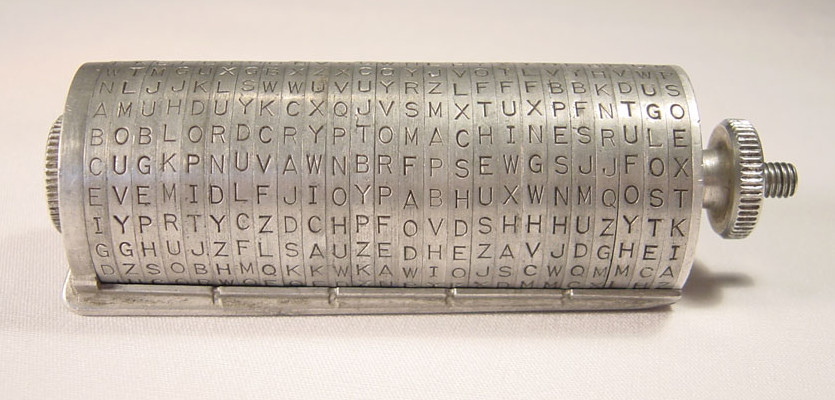

In [1]:
from IPython.display import Image
Image('m94.jpg')

[ Cette image est empruntée au [site de Bob Lord](http://www.ilord.com/m94.html) qui contient plusieurs images du M-94. ]

Le cryptographe M-94 (CSP-488 pour l'US Navy) est un cryptographe Bazeries à 25 rondelles en aluminium, chaque rondelle portant un alphabet de 26 lettres.

Basé sur les travaux préliminaires du Colonel Parker Hitt en 1911 (Hitt n'a connu le travail de Bazeries qu'à l'automne de 1914) et mis au point par le Major Joseph Mauborgne, ce cryptographe a été adopté par l'armée américaine en 1922. Il est resté en usage jusqu'en 1945.

Une variante, le M-138, appelée chiffrement à bandes [strip cipher], reprenait les 25 alphabets du M-94 déroulés, mis à plat et répétés deux fois sur des bandes métalliques. Ces bandes métalliques, numérotées comme les disques du M-94, peuvent coulisser dans un cadre. Les bandes étant placées dans l'ordre de la clé, on forme le message à gauche de la règle (5) en faisant coulisser les bandes. En faisant glisser la règle (4), on sélectionne une génératrice pour le texte chiffré, comme pour le M-94. Les deux cryptographes sont compatibles.

Une variante ultérieure, le M-138-A, comportera 30 bandes à choisir parmi 100, ce qui accroit beaucoup la sécurité du système.

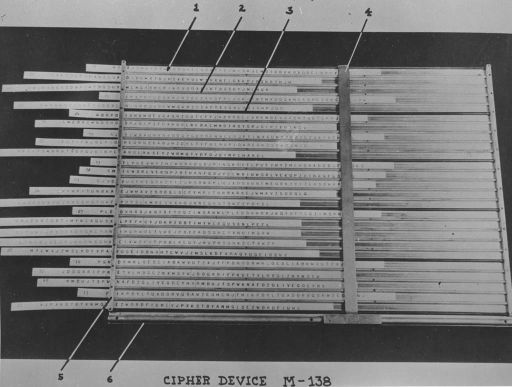

In [2]:
Image('m138.jpg')

L'idée n'est pas nouvelle. Dès 1893, Arthur Hermann avait inventé un [cryptographe à réglettes](http://gallica.bnf.fr/ark:/12148/bpt6k2151192/f307.item.zoom) construit d'après le système de Bazeries.

Le [manuel d'utilisation du M-94](http://maritime.org/tech/csp488man.htm) montre que son fonctionnement est identique à celui du cryptographe de Bazeries.  
On peut donc réutiliser les fonctions développées dans l'étude de ce dernier. Voir [Cryptographe de Bazeries](cryptographe_Bazeries.html).

### 1.1 Les alphabets

Les 25 alphabets sont incohérents et non pas déduits de mots-clés comme pour le cryptographe de Bazeries (sauf le dix-septième alphabet)

In [3]:
alpha = [
    'ABCEIGDJFVUYMHTQKZOLRXSPWN',
    'ACDEHFIJKTLMOUVYGZNPQXRWSB',
    'ADKOMJUBGEPHSCZINXFYQRTVWL',
    'AEDCBIFGJHLKMRUOQVPTNWYXZS',
    'AFNQUKDOPITJBRHCYSLWEMZVXG',
    'AGPOCIXLURNDYZHWBJSQFKVMET',
    'AHXJEZBNIKPVROGSYDULCFMQTW',
    'AIHPJOBWKCVFZLQERYNSUMGTDX',
    'AJDSKQOIVTZEFHGYUNLPMBXWCR',
    'AKELBDFJGHONMTPRQSVZUXYWIC',
    'ALTMSXVQPNOHUWDIZYCGKRFBEJ',
    'AMNFLHQGCUJTBYPZKXISRDVEWO',
    'ANCJILDHBMKGXUZTSWQYVORPFE',
    'AODWPKJVIUQHZCTXBLEGNYRSMF',
    'APBVHIYKSGUENTCXOWFQDRLJZM',
    'AQJNUBTGIMWZRVLXCSHDEOKFPY',
    'ARMYOFTHEUSZJXDPCWGQIBKLNV',  # <-- ARMY OF THE US
    'ASDMCNEQBOZPLGVJRKYTFUIWXH',
    'ATOJYLFXNGWHVCMIRBSEKUPDZQ',
    'AUTRZXQLYIOVBPESNHJWMDGFCK',
    'AVNKHRGOXEYBFSJMUDQCLZWTIP',
    'AWVSFDLIEBHKNRJQZGMXPUCOTY',
    'AXKWREVDTUFOYHMLSIQNJCPGBZ',
    'AYJPXMVKBQWUGLOSTECHNZFRID',
    'AZDNBUHYFWJLVGRCQMPSOEXTKI'
]

### 1.2 La clé

La formation de la clé numérique à partir d'une phrase-clé est identique à celle du cryptographe de Bazeries.

In [4]:
def strkey2numkey(s):
    """Retourne la clé-liste qui correspond à la clé-chaine s
    """
    key = s.split()                 # conversion de la clé en liste
    for i in range(len(key)):
        if key[i] != '?':
            key[i] = int(key[i])-1  # index début = 0
    return key

In [5]:
def numkey2strkey(k):
    """Retourne la clé-chaine qui correspond à la clé-liste k
    """
    s = ''
    for e in k:
        if e == '?':
            s += '  ?'
        else:
            s += str(' {:2d}'.format(e+1)) # index début = 1
    return s

In [6]:
import unicodedata
def keyword2strkey(s):
    """Retourne la clé-chaine de longueur 25 correspondant au mot-clé s
    """
    size = 25      # le cryptographe M94 a 25 rondelles
    alpha26 = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' # alphabet complet
    s = s.upper()                          # passage en majuscule
    s = s.replace('Œ', 'OE')               # au cas où...
    s = unicodedata.normalize('NFKD', s)
    s = u''.join([c for c in s if not unicodedata.combining(c)]) # suppression des accents
    s = ''.join([c for c in s if c in alpha26]) # on ne garde que les lettres
    if s == '':
        return []
    else:
        s = s*(1+size//len(s))
        s = s[:size]            # mise à longueur de la clé alphabétique
    k = [0]*size           # initialisation clé-liste
    idx = 0                # la clé-liste k comprend les entiers de 0 à 19
    for c in alpha26:      # pour chaque lettre de l'alphabet
        i = s.find(c, 0)   # on cherche si elle est dans le mot-clé
        while i != -1:
            k[i] = idx
            idx += 1
            i = s.find(c, i+1)
    return numkey2strkey(k)

Exemple tiré du manuel : avec la phrase-clé GENERAL ELECTRIC COMPANY on obtient la clé numérique   
`11 6 17 7 22 1 14 8 15 9 3 24 23 13 4 5 20 16 21 2 18 25 12 10 19`  
Vérification :

In [7]:
keyword2strkey('GENERAL ELECTRIC COMPANY')

' 11  6 17  7 22  1 14  8 15  9  3 24 23 13  4  5 20 16 21  2 18 25 12 10 19'

### 1.3 Chiffrement

In [8]:
import random
def C_M94(clair, clef):
    """ Chiffre le texte 'clair' avec le cryptographe M94 pour la clé fournie.
    """
    nb_alpha = len(alpha)            # nombre d'alphabets c-à-d de disques disponibles
    nb_car = len(alpha[0])           # nombre de caractères par alphabet
    k = strkey2numkey(clef)
    key_len = len(k)                 # nombre de disques utilisés
    n = len(clair)//key_len
    segments = [clair[i*key_len:(i+1)*key_len] for i in range(n)]
    if len(clair)%key_len:
        segments.append(clair[n*key_len:])  
    crypto = ''
    for s in segments:
        idx = [0]*len(s)
        g = random.randint(1, nb_car-1)
        for i in range(len(s)):
            idx[i] = alpha[k[i]].find(s[i])
        crypto += ''.join([alpha[k[i]][(idx[i]+g)%nb_car] for i in range(len(s))])
    return crypto

Prenons comme texte clair un passage tiré (au hasard !) de l'introduction du livre _Machine Cryptography and Modern Cryptanalysis_ de Cipher A. Deavour et Louis Kruh :

>In reading this book consider that the authors are both Americans and have a built-in bias about some subjects which may, at times, seem unfair. This is not intentional on our part, but we know of no way to eliminate the problem.

In [9]:
txt = 'INREADINGTHISBOOKCONSIDERTHATTHEAUTHORSAREBOTHAMERICANSANDHAVEABUILTINBIASABOUTSOME\
SUBJECTSWHICHMAYATTIMESSEEMUNFAIRTHISISNOTINTENTIONALONOURPARTBUTWEKNOWOFNOWAYTOELIMINATE\
THEPROBLEM'
clef = keyword2strkey('GENERAL ELECTRIC COMPANY')
crypto = C_M94(txt, clef)
crypto, len(crypto)

('FJEVIHXXOUFMGTYHQFJBBHNHDLZVQOMLXGVPLWTSBPUGKXIAKIVKWTPZHERNZBIEIACFMTHQXGBSNCZHNKGXWZQYMAXAYRKEKGLXAMGCLRYLGLMCTFCJACWRFMAGQPOVQDJODIPFKYZGDQDIDSKLQVYLRMPGLHCWNLTRGDHBPWRPCFRUZEPHJD',
 182)

### 1.4 Déchiffrement

In [10]:
from math import log10
logf4g ={}                 # dic des log des fréquences des 4-grammes
f = open('brut4g_en.txt')  # statistique des quadrigrammes anglais
total = 0                  # effectif total
for line in f:
    (w, c) = line.split(sep= ' ')
    logf4g[w] = int(c)
    total += int(c)
for w in logf4g:
    logf4g[w] = -log10(logf4g[w]/total)
f.close()

In [11]:
def logscore(s):
    logsum = 0
    default = 100               # quadrigramme inconnu f = 10^-100 
    for i in range(len(s)-3):
        logsum += logf4g.get(s[i:i+4], default)
    return logsum

In [12]:
logscore('ALLISWELL')

25.085002455274427

In [13]:
logscore('ALILWSELL')

316.6152095395737

In [14]:
def D_M94(crypto, clef):
    """ Déchiffre le texte 'crypto' avec le cryptographe M-94 pour la clé fournie.
        La fonction logscore doit être définie pour la langue du texte clair.
    """
    nb_alpha = len(alpha)      # nombre d'alphabets c-à-d de disques disponibles
    nb_car = len(alpha[0])     # nombre de caractères par alphabet
    k = strkey2numkey(clef)
    key_len = len(k)      # nombre de disques utilisés sur le cryptographe
    n = len(crypto)//key_len
    segments = [crypto[i*key_len:(i+1)*key_len] for i in range(n)]
    if len(crypto)%key_len:
        segments.append(crypto[n*key_len:])
    clair = ''
    segment_precedent = ''
    for s in segments:
        idx = [0]*len(s)
        best_score = float('inf')
        best_txt = ''
        for g in range(nb_car):
            for i in range(len(s)):
                idx[i] = alpha[k[i]].find(s[i])
            txt = ''.join([alpha[k[i]][(idx[i]+g)%nb_car] for i in range(len(s))])
            score = logscore(segment_precedent+txt)
            if score < best_score:
                best_score = score
                best_txt = txt
        segment_precedent = best_txt
        clair += best_txt   
    return clair

In [15]:
D_M94(crypto, clef)

'INREADINGTHISBOOKCONSIDERTHATTHEAUTHORSAREBOTHAMERICANSANDHAVEABUILTINBIASABOUTSOMESUBJECTSWHICHMAYATTIMESSEEMUNFAIRTHISISNOTINTENTIONALONOURPARTBUTWEKNOWOFNOWAYTOELIMINATETHEPROBLEM'

## 2. Attaque à texte chiffré seulement (ciphertext-only attack)

On reprend l'attaque du cryptographe de Bazeries. Il suffit de changer quelques paramètres.

### 2.1 Recherche d'une partie de la clé

In [16]:
import itertools
def cherche_minimum(crypto, pos, key_len=25, nb_top=25):
    """ Retourne la liste des nb_top meilleures 4-listes de la clé 
        à partir de la position pos donnée.
        La longueur de la clé est de 25 pour le cryptographe M94.
    """
    nb_alpha = len(alpha)      # nombre d'alphabets c-à-d de disques disponibles
    nb_car = len(alpha[0])     # nombre de caractères par alphabet
    resultats = []             # liste des solutions
    max_liste = 100*nb_top     # limite avant purge de la liste de résultats
    n = len(crypto)//key_len   # nombre de segments complets de 20 caractères
    segments = [crypto[i*key_len:(i+1)*key_len] for i in range(n)] # liste des segments
    nb_disques = 4             # on cherche les 4-listes
    list_idx = [i for i in range(nb_alpha)] # liste desnombres de 1 à 20
    perms = itertools.permutations(list_idx, nb_disques)
    for p in perms:            # pour chaque 4-liste de [1..20]
        best_score_p = 0          # meilleur score pour la 4-liste p
        best_gs = []              # meilleures génératrices
        for s in segments:              # pour chaque segment s de 20 caractères du crypto
            idx = [alpha[p[i]].find(s[i+pos]) for i in range(nb_disques)]
            best_score_s = float('inf')   # meilleur score pour le segment s
            best_g = 0                    # meilleure génératrice
            for g in range(nb_car):          # pour chaque génératrice
                txt = ''.join([alpha[p[i]][(idx[i]+g)%nb_car] for i in range(nb_disques)])
                score = logscore(txt)
                if score < best_score_s:  # sélection meilleure génératrice du segment s
                    best_score_s = score
                    best_g = g
            best_score_p += best_score_s  # m-à-j meilleur score pour la 4-liste
            best_gs.append(best_g)        # ajout de la meilleure génératrice
        resultats.append([best_score_p, p, best_gs])
        if len(resultats) > max_liste:              # on limite la taille de la liste
            resultats.sort(key=lambda tup: tup[0])  # classement
            resultats = resultats[:nb_top]          # on garde les nb_top meilleurs
    resultats.sort(key=lambda tup: tup[0])  # classement
    resultats = resultats[:nb_top]          # on garde les nb_top meilleurs
    resultats = [[pos, r[1], r[2]] for r in resultats] # on supprime le logscore
    return resultats

In [17]:
cherche_minimum(crypto, 0)

[[0, (10, 5, 16, 6), [19, 1, 9, 19, 2, 7, 3]],
 [0, (7, 1, 2, 9), [20, 15, 18, 22, 18, 12, 14]],
 [0, (16, 19, 8, 5), [22, 10, 9, 13, 20, 17, 3]],
 [0, (11, 18, 24, 23), [16, 17, 24, 11, 5, 17, 6]],
 [0, (20, 8, 19, 4), [5, 3, 8, 9, 6, 3, 25]],
 [0, (1, 13, 22, 20), [8, 25, 12, 24, 16, 17, 9]],
 [0, (19, 10, 16, 9), [16, 21, 17, 18, 16, 1, 2]],
 [0, (1, 9, 15, 21), [24, 17, 10, 20, 1, 16, 14]],
 [0, (3, 6, 5, 4), [9, 25, 11, 20, 2, 7, 5]],
 [0, (10, 4, 13, 16), [5, 13, 2, 7, 15, 13, 22]],
 [0, (4, 7, 14, 23), [5, 10, 20, 3, 2, 10, 10]],
 [0, (5, 21, 19, 8), [20, 18, 2, 22, 5, 8, 23]],
 [0, (15, 2, 0, 23), [11, 15, 1, 2, 8, 5, 10]],
 [0, (3, 4, 18, 16), [15, 16, 2, 18, 19, 7, 24]],
 [0, (1, 8, 4, 11), [15, 19, 14, 18, 15, 5, 15]],
 [0, (8, 22, 9, 11), [15, 17, 13, 10, 3, 20, 22]],
 [0, (23, 7, 15, 4), [23, 4, 7, 5, 24, 17, 18]],
 [0, (6, 10, 19, 12), [5, 8, 7, 19, 7, 25, 25]],
 [0, (11, 1, 8, 4), [5, 24, 3, 11, 19, 17, 12]],
 [0, (8, 10, 5, 21), [1, 19, 10, 6, 7, 18, 20]],
 [0, (16, 0, 

In [18]:
def diff_listes(a, b):
    """ Retourne le nombre d'éléments identiques de deux listes.
        Par exemple, [1, 2, 3, 4, 5] et [1, 5, 3, 4, 7] ont 3 éléments communs.
    """
    coincidence = 0
    for i in range(len(a)):
        if a[i] == b[i]:
            coincidence += 1
    return coincidence

In [19]:
def combine_clefs(s1, s2, key_len):
    if len(set(s1[1]).union(set(s2[1]))) != 5:
        return []
    s = ['?']*key_len
    for i in range(4):
        s[s1[0]+i] = s1[1][i]     # on recopie s1 dans s
    for i in range(4):
        if s[s2[0]+i] == '?' or s[s2[0]+i] == s2[1][i]: # on complète avec s2 si compatible
            s[s2[0]+i] = s2[1][i]
        else:
            return []      
    return s

In [20]:
def eval_clef_partielle(crypto, pkey):
    """Evaluation d'une clé partielle 'pkey sur le crypto
    """
    nb_alpha = len(alpha)      # nombre d'alphabets c-à-d de disques disponibles
    nb_car = len(alpha[0])     # nombre de caractères par alphabet
    key = strkey2numkey(pkey)       # conversion de la clé en liste
    key_len = len(key)
    debut = 0
    while key[debut] == '?':
        debut += 1
    fin = debut
    while key[fin] != '?':
        fin += 1
        if fin == len(key):
            break
    partie = [int(key[i]) for i in range(debut, fin)]  # partie connue de la clé
    n = len(crypto)//key_len
    segments = [crypto[i*key_len:i*key_len+key_len] for i in range(n)]
    nb_disques = len(partie)
    best_score_p = 0
    for s in segments:
        idx = [0]*nb_disques
        best_score_s = float('inf')
        for g in range(nb_car):
            for i in range(nb_disques):
                    idx[i] = alpha[partie[i]].find(s[i+debut])
            txt = ''.join([alpha[partie[i]][(idx[i]+g)%nb_car] for i in range(nb_disques)])
            score = logscore(txt)
            if score < best_score_s:
                best_score_s = score
        best_score_p += best_score_s
    return best_score_p

In [21]:
import time 
def recherche_clef_partielle(crypto, key_len=25, nb_top=15):
    start = time.time()
    ancien = cherche_minimum(crypto, 0, key_len, nb_top)
    for pos in range(1, key_len-3):
        nouveau = cherche_minimum(crypto, pos, key_len, nb_top)       
        for sol0 in nouveau:
            for sol1 in ancien:
                if diff_listes(sol0[2], sol1[2] )>= 2:   # 2 génératrices en commun au moins
                    key = combine_clefs(sol0, sol1, key_len)
                    if key:
                        str_key = numkey2strkey(key)
                        score = eval_clef_partielle(crypto, str_key)
                        print(str_key, ' : ', "{:10.5f}".format(score), flush=True)
        ancien = nouveau
    delta = int(time.time()-start)
    print('----- terminé en ',delta//60, 'min', delta%60, 'sec')

### 2.2 Complètement de la clé

In [22]:
def complete_clef(crypto, str_key):
    nb_alpha = len(alpha)      # nombre d'alphabets c-à-d de disques disponibles
    nb_car = len(alpha[0])     # nombre de caractères par alphabet
    key = strkey2numkey(str_key)       # conversion de la clé en liste
    key_len = len(key)
    debut = 0
    while key[debut] == '?':   # recherche début de la partie connue de la clé
        debut += 1
    fin = debut
    while key[fin] != '?':     # recherche fin de la partie connue de la clé
        fin += 1
        if fin == len(key):
            break
    partie = [int(key[i]) for i in range(debut, fin)]  # partie connue de la clé
    if debut >= 4:
        avant = True   # la partie variable est avant la partie connue
        nb_disques = 4+len(partie)   # nombre de disques à lire
        nb_pv = 4                    # nombre de disques partie variable
        offset = debut-4
        p_avant = ['?']*(debut-4)
        p_apres = ['?']*(len(key)-fin)
    elif fin <= len(key) - 4:
        avant = False  # la partie variable est après la partie connue
        nb_disques = len(partie)+4   # nombre de disques à lire
        nb_pv = 4
        offset = debut
        p_avant = ['?']*(debut)
        p_apres = ['?']*(len(key)-fin-4)
    elif fin != len(key):
        avant = False  # la partie variable est après la partie connue
        nb_disques = key_len-debut# len(key)-fin+4   # nombre de disques à lire
        nb_pv = len(key)-fin
        offset = debut
        p_avant = ['?']*(debut)
        p_apres = []
    elif debut != 0:
        avant = True   # la partie variable est avant la partie connue
        nb_disques = key_len # 4+debut    # nombre de disques à lire
        nb_pv = debut
        offset = 0 #debut
        p_avant = []
        p_apres = []
    else:
        return str_key
    n = len(crypto)//key_len
    segments = [crypto[i*key_len:i*key_len+key_len] for i in range(n)]
    list_idx = list(set([i for i in range(nb_alpha)])-set(partie))
    perms = itertools.permutations(list_idx, nb_pv)
    best_p0 = []
    best_score0 = float('inf')
    for p in perms:
        best_score_p = 0
        if avant:
            pc = list(p)+partie
        else:
            pc = partie.copy()+list(p)
        for s in segments:
            idx = [0]*nb_disques
            best_score_s = float('inf')
            for g in range(nb_car):
                for i in range(nb_disques):
                    idx[i] = alpha[pc[i]].find(s[i+offset])
                txt = ''.join([alpha[pc[i]][(idx[i]+g)%nb_car] for i in range(nb_disques)])
                score = logscore(txt)
                if score < best_score_s:
                    best_score_s = score
            best_score_p += best_score_s
        if best_score_p < best_score0:
            best_score0 = best_score_p
            best_p0 = pc
    return numkey2strkey(p_avant+best_p0+p_apres)

In [23]:
def clef_totale(crypto, key):
    k = key
    while '?' in k:
        k = complete_clef(crypto, k)
        print(k, flush=True)
    txt = D_M94(crypto, k)
    print(txt)
    print(logscore(txt))

Essayons de décrypter le message donné en 1.3.

In [24]:
recherche_clef_partielle(crypto)

 11  6 17  7 22  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    51.80678
  ?  6 17  7 22  1  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    54.17509
  ?  ?  6  8 12 11 25  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    56.34560
  ?  ?  8  1  4 15 12  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    57.84567
  ?  ?  ?  ? 19  7 11  6 23  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    57.95005
  ?  ?  ?  ? 19  7 11  6  4  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    63.06081
  ?  ?  ?  ?  ?  ?  ? 11  4  3 15 12  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    57.15170
  ?  ?  ?  ?  ?  ?  ? 11  4  3 15  6  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    59.16215
  ?  ?  ?  ?  ?  ?  ?  ?  4  3 15 12 14  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    55.41370
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 23  1 16 18 12  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    63.63955
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 22  7 18 16  2  ?  ?  ?  ?  ?  ?  :    56.65523

La clé partielle de plus petit logscore est la première. Complétons-là :

In [25]:
clef_totale(crypto, '11  6 17  7 22  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?')

 11  6 17  7 22  1 14  8 15  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?
 11  6 17  7 22  1 14  8 15  9  3 24 23  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?
 11  6 17  7 22  1 14  8 15  9  3 24 23 13  4  5 20  ?  ?  ?  ?  ?  ?  ?  ?
 11  6 17  7 22  1 14  8 15  9  3 24 23 13  4  5 20 16 21  2 18  ?  ?  ?  ?
 11  6 17  7 22  1 14  8 15  9  3 24 23 13  4  5 20 16 21  2 18 25 12 10 19
INREADINGTHISBOOKCONSIDERTHATTHEAUTHORSAREBOTHAMERICANSANDHAVEABUILTINBIASABOUTSOMESUBJECTSWHICHMAYATTIMESSEEMUNFAIRTHISISNOTINTENTIONALONOURPARTBUTWEKNOWOFNOWAYTOELIMINATETHEPROBLEM
748.557113423746


On a retrouvé le texte clair et la clé.

## 3. Les 25 messages du Major Mauborgne

Sur l'une des pages du site web [_Cryptography & Electronic Warfare_ de Brooke Clarke](http://www.prc68.com/I/M94TM.htm), on trouve l'intéressante histoire des messages du Major Mauborgne.

Le [Major Joseph Mauborgne](https://fr.wikipedia.org/wiki/Joseph_Mauborgne) a mis au point le M-94 en 1917. Pour tester sa sécurité, il a chiffré avec la même clé une série 25 messages. En avril 1918, il a envoyé à [William F. Friedman](https://fr.wikipedia.org/wiki/William_F._Friedman) et [Herbert 0. Yardley](https://fr.wikipedia.org/wiki/Herbert_Yardley) les 25 premières lettres de chacun des 25 messages, pour les cryptanalyser.  
Ni Friedman, ni Yardley ne sont parvenus à décrypter les messages (ils ne connaissaient pas les alphabets du M-94). En conséquence, le M-94 a été adopté par l'armée en 1921.


In [26]:
messages = [
    'VFDJL QMMJB HSYVJ KCJTJ WDKNI',
    'CGNJM ZVKQC JPRJR CGOXG UCZVC',
    'CSTDT SSDJN JDKKT IXVEX VHDVK',
    'OZBGF VTUEC UGTZD KYWJR VZSDG',
    'QIRMB FTKBY CGAQV DQCVQ AHZGY',
    'VQWRM IHDHB RQBWU LKJCS KEYUU',
    'SSEIQ DWHNH QHGIK HAADN GNFBY',
    'VXDVX NIGJO PCOTN GKWAX YTNWL',
    'QJRLH AWTWU CYXVM BGJCR SBHWF',
    'DULPK UXMVL XFUPS ULRZK PDALY',
    'DCAIY LUPMB NACQE OPTLH KKRGT',
    'MGODT VGUYX NHKBE WPOUR VTQOE',
    'TBVEB QDXGP LCPUY AVVBK ZEOZY',
    'FIJDW WBKTY GBSMB PZWYP RRZCW',
    'DYVPJ CLNXE SCMF0 YPIZF PEBHM',
    'MYYTJ RFMEP PHDXP ODFZO WLGLA',
    'EYKKD XHTEV TRXWK CJPSG MASCY',
    'LGQLV HTUIP YAUGJ PGDLH UZTKV',
    'BRKTJ RGGTB HMLXX FRHOA AZVWU',
    'CDUDV DBZUA ELRPO SPUJD XRZWA',
    'EUFBT TWNIY HHTNW QNFVE NYGBY',
    'TUTVY NGLPG TYOLI HXZQT XSGOJ',
    'PBTJC CJONJ UNIXB UAQBI WNIHL',
    'VHNKR XVZMD KFHUY XRNDD KXXVM',
    'NNHBF VQH0B LXCYM AKFLS SSJXG'
]

On ne garde que les huit premiers messages, ce qui est suffisant pour trouver la clé (on connait les alphabets du M-94). On peut naturellement utiliser les 25 messages, mais cela allonge le temps de recherche de la clé.

In [27]:
crypto1 = ''
for i in range(8):
    crypto1 += messages[i]
crypto1 = crypto1.replace(' ', '')
crypto1, len(crypto1)

('VFDJLQMMJBHSYVJKCJTJWDKNICGNJMZVKQCJPRJRCGOXGUCZVCCSTDTSSDJNJDKKTIXVEXVHDVKOZBGFVTUECUGTZDKYWJRVZSDGQIRMBFTKBYCGAQVDQCVQAHZGYVQWRMIHDHBRQBWULKJCSKEYUUSSEIQDWHNHQHGIKHAADNGNFBYVXDVXNIGJOPCOTNGKWAXYTNWL',
 200)

In [28]:
recherche_clef_partielle(crypto1)

  9 16 23 12  2  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    65.29591
  ?  9  3 10 13 12  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    69.00258
  ? 24  8 11 13  9  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    65.63093
  ? 19 23 12  2  8  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    66.74027
  ? 16 23 12  2  8  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    63.98980
  ? 24  8 11 13 25  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    66.55418
  ?  ?  ?  ?  ? 24 25  3 16 10  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    70.19178
  ?  ?  ?  ?  ?  ?  ? 24 21 11 19  8  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    61.17308
  ?  ?  ?  ?  ?  ?  ?  ?  ? 22  7  4 17 21  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    64.19227
  ?  ?  ?  ?  ?  ?  ?  ?  ? 24 23 21 20 10  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    66.96730
  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 12  7 11 10 15  ?  ?  ?  ?  ?  ?  ?  ?  :    65.73088

In [29]:
clef_totale(crypto1,'?  ?  ?  ?  ?  ?  ? 24 21 11 19  8  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?')

  ?  ?  ?  6  2 13  3 24 21 11 19  8  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?
  ?  ?  ?  6  2 13  3 24 21 11 19  8  7 16 15 17  ?  ?  ?  ?  ?  ?  ?  ?  ?
  ?  ?  ?  6  2 13  3 24 21 11 19  8  7 16 15 17 10  9  1 12  ?  ?  ?  ?  ?
  ?  ?  ?  6  2 13  3 24 21 11 19  8  7 16 15 17 10  9  1 12 25 23 22 20  ?
  ?  ?  ?  6  2 13  3 24 21 11 19  8  7 16 15 17 10  9  1 12 25 23 22 20 18
  4 14  5  6  2 13  3 24 21 11 19  8  7 16 15 17 10  9  1 12 25 23 22 20 18
CHLORINEANDOXYGENHAVENOTBWHEREDIDYOUMEETEACHOTHERIDRINKTHISPOTIONQUICKLYFORWELLMAKEMETHESAMESHAPEBUTCYANOGENISACOLORLESSGASINPHENOLSAREBENZENEDERIVATIXYLONITEANDARTIFICIALIVORIWENTTOANEWTHEATRETHEPALA
1549.2974501846174


On a la clé !

In [30]:
key = '4 14  5  6  2 13  3 24 21 11 19  8  7 16 15 17 10  9  1 12 25 23 22 20 18'

Déchiffrons les 25 messages :

In [31]:
for m in messages:
    print(D_M94(m.replace(' ', ''), key))

CHLORINEANDOXYGENHAVENOTB
WHEREDIDYOUMEETEACHOTHERI
DRINKTHISPOTIONQUICKLYFOR
WELLMAKEMETHESAMESHAPEBUT
CYANOGENISACOLORLESSGASIN
PHENOLSAREBENZENEDERIVATI
XYLONITEANDARTIFICIALIVOR
IWENTTOANEWTHEATRETHEPALA
PICRICACIDISEXPLOSIVEANDI
LLANGOLLENISATOWNINWALESA
YVETTEAREYOUGOINGSHOPPING
ORTHOPHOSPHORICISTHECOMPO
CAOUTCHOUCISCLOSELYALLIED
OLEFIANTGASETHENEORETHYLE
SEETHETERRIBLELANKTACKLEA
ITISATHINLIMPIDLIQUIDTHAT
IFITISINSOLUBLEINWATERITI
SILVERHASBEENKNOWNFROMREM
HOTCONCENTRATEDSULPHURICA
SMALLCOEFFICIENTOFEXPANSI
PALLADIUMPOSSESSESAPOWERO
ABSORBINGANDCONDENSINGTHI
COMPOUNDSOFPLATINUMFORMTW
GOLDOCCURSWIDELYDISTRIBUT
OXIDATIOLCAUSEDBYITPROBAB


On retrouve, à quelques erreurs typopgraphiques près, les [solutions publiées par l'ACA](http://www.prc68.com/I/M94S.htm).

````
CHLORINE AND OXYGEN HAVE NOT B       Chlorine and oxygen have not b
WHERE DID YOU MEET EACH OTHER I      Where did you meet each other
DRINK THIS POTION QUICKLY FOR        Drink this potion quickly for
WELL MAKE ME THE SAME SHAPE BUT      Well, make me the same shape but
CYANOGEN IS A COLORLESS GAS IN       Cyanogen is a colorless gas in
PHENOLS ARE BENZENE DERIVATI         Phenols are benzene derivati
XYLONITE AND ARTIFICIAL IVOR         Xylonite and artificial ivor
I WENT TO A NEW THEATRE THE PALA     I went to a new theatre, the Pala
PICRIC ACID IS EXPLOSIVE AND I       Picric acid is explosive and i
LLANGOLLEN IS A TOWN IN WALES A      Llangollen is a town in Wales a
YVETTE ARE YOU GOING SHOPPING        Yvette, are you going shopping
ORTHOPHOSPHORIC IS THE COMPO         Orthophosphoric is the compo
CAOUTCHOUC IS CLOSELY ALLIED         Caoutchouc is closely allied
OLEFIANT GAS ETHENE OR ETHYLE        Olefiant gas, ethene or ethyle
SEE THE TERRIBLE LANK TACKLE A       See the terrible tank tackle a
IT IS A THIN LIMPID LIQUID THAT      It is a thin limpid liquid that
IF IT IS INSOLUBLE IN WATER IT I     If it is insoluble in water it i
SILVER HAS BEEN KNOWN FROM REM       Silver has been known from rem
HOT CONCENTRATED SULPHURIC A         Hot concentrated sulphuric a
SMALL COEFFICIENT OF EXPANSI         Small coefficient of expansi
PALLADIUM POSSESSES A POWER O        Palladium possesses a power o
ABSORBING AND CONDENSING THI         Absorbing and condensing thi
COMPOUNDS OF PLATINUM FORM TW        Compounds of platinum form tw
GOLD OCCURS WIDELY DISTRIBUT         Gold occurs widely dristribut
OXIDATIOL CAUSED BY IT PROBAB        Oxidation caused by it probab
````

On imagine la surprise de W. Friedman quand il a trouvé, en 1941, les solutions dans les papiers du Général Mauborgne qui venait de prendre sa retraite. Certes, les messages sont en anglais, mais le vocabulaire est peu courant !

## 4. Le message de  Wilhelm M. Plotz (alias CipherClerk)

Au tout début de sa [page web consacrée au M-94](https://www.apprendre-en-ligne.net/crypto/bibliotheque/Plotz/VirtualM94.html) Wilhelm M. Plotz donne le cryptogramme suivant :

In [32]:
crypto2 = '\
J U T H G   F F H J T   E U O N G   W Z L I Z   A G O P I \
I L L G Z   W C Y P Q   N D Z N I   C S W E I   L Y S U A \
L Y R M E   G K B U P   U Z C O S   B C P I M   S M R D W \
Y W O Y R   I O S G Z   W H F H L   O U M J T   D L X M H \
Y O U U C   J N H S S   Z S F O A   Y D M A B   V Z Z Q W \
O Q K C J   N T T R I   V O S A W   V C G H X   B U F P J \
V N Y P F   S V H P E   T K D P K   P Q K L F   F C M M P \
V C H N X   X X T W L   A K X C H   R R B B W   C N M H S \
Q L T K V   T L Y H L   O J C M Y   Z R R G Q   W G S V C \
K D J U Z   D S E J P   J Z C G C   A S Q E B   J W Z W Y \
B Z V B N   J N U Q Y   E C Z N S   B I A S L   Y A B V W \
G C Q U Q   Y K D J X   T V I M J   R G F S U   X Q N W G \
I H M R W   J B A W X   I M I N L   L G E Q H   Q U G B X'

In [33]:
crypto2 = crypto2.replace(' ', '')
crypto2, len(crypto2)

('JUTHGFFHJTEUONGWZLIZAGOPIILLGZWCYPQNDZNICSWEILYSUALYRMEGKBUPUZCOSBCPIMSMRDWYWOYRIOSGZWHFHLOUMJTDLXMHYOUUCJNHSSZSFOAYDMABVZZQWOQKCJNTTRIVOSAWVCGHXBUFPJVNYPFSVHPETKDPKPQKLFFCMMPVCHNXXXTWLAKXCHRRBBWCNMHSQLTKVTLYHLOJCMYZRRGQWGSVCKDJUZDSEJPJZCGCASQEBJWZWYBZVBNJNUQYECZNSBIASLYABVWGCQUQYKDJXTVIMJRGFSUXQNWGIHMRWJBAWXIMINLLGEQHQUGBX',
 325)

On ne garde que 8 segments pour chercher la clé :

In [34]:
recherche_clef_partielle(crypto2[:25*8])

 23 10  1 13 18  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :   163.44912
  6 10  1 13 18  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :   160.03166
 15 10  1 13 18  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    70.10726
 11 12 20 22 16  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    65.92429
  2 12 20 22 16  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    66.79319
 23 10  1 13  8  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    69.97823
  6 10  1 13  8  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    70.11584
 15 10  1 13  8  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    69.68562
  ?  2 10  4  3  6  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    64.06684
  ?  ? 11 25 19  2 12  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    70.52726
  ?  ?  ?  ?  ? 22 16 14  7 23  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  :    64.26828

Essayons de compléter la clé partielle de plus petit score :

In [35]:
clef_totale(crypto2,'?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ?  ? 16  3  9 19 24  ?  ?  ?  ?  ?  ?  ?')

  ?  ?  ?  ?  ?  ?  ?  ?  ?  2 12 13 10 16  3  9 19 24  ?  ?  ?  ?  ?  ?  ?
  ?  ?  ?  ?  ? 18 23  8  7  2 12 13 10 16  3  9 19 24  ?  ?  ?  ?  ?  ?  ?
  ?  1 15  5 21 18 23  8  7  2 12 13 10 16  3  9 19 24  ?  ?  ?  ?  ?  ?  ?
  ?  1 15  5 21 18 23  8  7  2 12 13 10 16  3  9 19 24 14  4 17  6  ?  ?  ?
  ?  1 15  5 21 18 23  8  7  2 12 13 10 16  3  9 19 24 14  4 17  6 22 20 25
 11  1 15  5 21 18 23  8  7  2 12 13 10 16  3  9 19 24 14  4 17  6 22 20 25
THOSEWHOBOASTTHATTHEYCANDECIPHERALETTERWITHOUTKNOWINGITSSUBJECTMATTERANDWITHOUTPRELIMINARYAIDAREGREATERCHARLATANSTHANTHOSEWHOWOULDBOASTOFUNDERSTANDINGALANGUAGEWHICHTHEYHAVENEVERLEARNEDDICTIONNAIREPHILOSOPHIQUEUNDERTHEARTICLEPOSTEBYVOLTAIRFOUNDINMILITARYCRYPTANALYTICSPARTONEVOLUMEONECONGRATUALTIONSOBVIOUSELYYOUARENTABOASTERG
1479.893754893217


````
THOSE WHO BOAST THAT THEY CAN DECIPHER A LETTER WITHOUT KNOWING ITS SUBJECT MATTER AND WITHOUT PRELIMINARY AID ARE GREATER CHARLATANS THAN THOSE WHO WOULD BOAST OF UNDERSTANDING A LANGUAGE WHICH THEY HAVE NEVER LEARNED.
DICTIONNAIRE PHILOSOPHIQUE UNDER THE ARTICLE POSTE BY VOLTAIR
FOUND IN MILITARY CRYPTANALYTICS PART ONE VOLUME ONE 
CONGRATUALTIONS OBVIOUSELY YOU AREN'T A BOASTER G
````

Yeah! I can decipher it! I'm not a boaster :-))  

Le passage est en note à la page 3 de _Military Cryptanalytics_ Part I - volume 1 :
>The application in practical, operational cryptanalysis of "probable words" or "cribs", i. e., plain text assumed or known to be present in a cryptogram, is developed in time of war into a refinement the extent and usefulness of which cannot be appreciated by the uninitiated. Even a great a thinker as Voltaire found the subject of cryptanalysis stretching his credulity to the point that he said:  
"Those who boast that they can decipher a letter without knowing its subject matter, and without preliminary aid, are greater charlatans than those who would boast of understanding a language which they have never learned." - _Dictionnaire Philosophique_, under the article "Poste".

Sous l'article [Poste du Dictionnaire Philosophique](https://fr.wikisource.org/wiki/Page%3AVoltaire_-_%C5%92uvres_compl%C3%A8tes_Garnier_tome20.djvu/268), on trouve :
>On opposa à ces énigmes l’art de les déchiffrer ; mais cet art fut très-fautif et très-vain. On ne réussit qu’à faire accroire à des gens peu instruits qu’on avait déchiffré leurs lettres, et on n’eut que le plaisir de leur donner des inquiétudes. Telle est la loi des probabilités que, dans un chiffre bien fait, il y a deux cents, trois cents, quatre cents à parier contre un que dans chaque numéro vous ne devinerez pas la syllabe dont il est représentatif.

>Le nombre des hasards augmente avec la combinaison de ces numéros ; et le déchiffrement devient totalement impossible quand le chiffre est fait avec un peu d’art.

>Ceux qui se vantent de déchiffrer une lettre sans être instruits des affaires qu’on y traite, et sans avoir des secours préliminaires, sont de plus grands charlatans que ceux qui se vanteraient d’entendre une langue qu’ils n’ont point apprise.

Voltaire a manqué de clairvoyance sur le sujet. Il faut dire qu'à son époque les écrits sur les méthodes permettant de casser un chiffre étaient très confidentiels.

## 5. Exercices

Pour les lecteurs qui voudraient vérifier / modifier / améliorer les fonctions précédentes, je  propose les dépêches suivantes à décrypter. Elles sont toutes en anglais.

### Cryptogramme 1

````
FYQKU RCGRF GSXNQ AFLAT ATXNZ OMLGF HTMIF FMGDG ZRQKU HSMUS
RCGGE JWVBY MEYLJ JMBPV CYQJH COZHO HLNBZ XEMUA SFLIK KSCYS
MSHQL NPXFP MMGVV SLTXW YOYFC WYNJD JQCEK BKPBU IGSKM NYDIN
QXUDU PLPQB SASSI BPATM TKZRS DFPYJ KRFJG QALQM JQWOE EOYFX
DBAMQ AMXJT EVBAD RJXRX NPHNB TA
````

### Cryptogramme 2

````
RAEOS XVBIQ FRLHN TZJYT LHMMH FCWWD NSCOS VQFOJ FONLK EKQDL
CEMTH XMEXA JPQRL ZYBJM LGDKU LDKRF FAFLT VSHAE QVQMF RMBXZ
TMLPD ZKIAL BZULZ SXPDG JIKST ETQSL QFJSB RWIXY HEZIP MNKOS
YESBI UZPLY PNSYG IRGIZ GOVEY JFEJV AHRAF
````

### Cryptogramme 3

````
HFMRU NCMZK BJEZT FDMSI NECUD DMHGJ LDUKK SOPTG LNIFB DBXCG
TGAFK CYXXL GAGIU UVJPW VBFYJ KTDYG DZRYH GWZCR RVAOS DJGPA
ZWQGX LFDOQ MYPHE VZMEE SITKP JGJEN GFPIV UKSJV IKZKH VFRNX
QGJML EDVAQ EPZGH OFBJP KXQBQ YMWQM WKSEV YJFTI NSSWK NFAJZ
XITK
````

### Cryptogramme 4

````
VDCHI EAPJR GLHCZ NCXLM PGDAI ZIOXJ REXKM PVDLD KQXJF MYKOE
DPZIC YOHLL WCKMQ JGFHT YZCEZ ASFWR ZIGPP ZBIXF LGPXS HFQJX
ESKFZ NTEHY YYGQZ SCTYB GEKRM DHIQM LKUPR ZDXJS TVWDN RCCDR
RNI
````

### Cryptogramme 5

Les trois cryptogrammes suivants sont chiffrés avec la même clé. Pouvez-vous les décrypter ?
````
ZRCVG JZGBQ CLPTE JICLO EGVJA IHHBE AVNJA ULOCC XGOCN BBIQH
MTTEY WATDQ DAODE TYCMP NB
````
````
CRHSK NDYWA EDWJE OOEQQ UQIYB RDQNI GVYQU QPEDG KPEJF NKILV
VXMKK IBZNH HPOUD FUFMV QGIKQ BZNXN ILZ
````
````
AOITF VXXDC SRTVC IKKUI DSDSK LYJSZ QHQWP NGABP XTUDU JTFMG
QKMSK VEWNR GENJ
````

## 6. Conclusion

L'attaque développée pour le cryptographe de Bazeries se transpose sans peine au M-94. Comme ce dernier a 25 rondelles au lieu de 20, la recherche des clés partielles est plus longue. On n'est pas obligé de laisser cette recherche aller jusqu'au bout  : si l'on voit des clés partielles qui se recoupent, on peut les compléter dans un autre processus pour voir si on obtient le texte clair.

Pour que l'attaque réussisse, il faut un cryptogramme assez long, au moins 6 génératrices, c'est-à-dire au moins 150 caractères. En cas d'échec pour un cryptogramme court, on peut augmenter le paramètre `nb_top` fixé à 15 par défaut.

## Références

* Lambros Callimahos and William Friedman - Military Cryptanalytics Part I Volume 1  
  Aegean Park Press 1985
  
* William Friedman - The Riverbank Publications Volume 2  
  Publication No. 20 Several Machine Ciphers and Methods for their Solution  
  Aegean Park Press 1979

****
Le 31/01/2017 - Contact : <A HREF="mailto:Rossignol@bribes.org">Rossignol@bribes.org</A> 